In [51]:
"""
Authors: Viktoriia Vlasenko
"""
import numpy as np
import matplotlib.pyplot as plt


#CONSTANTS
hc = 40 #W(m^2K)
P = 0.0157 #m
k = 240 #W/(mK)
Ac = 1.964*10**(-5) #m^2
L = 1 #m
Ts = 293 #K
T_0 = 473 #K
T_L = 293 #K

N = 20 #liczba czesci preta

In [52]:
Beta = hc * P / (k * Ac)
h = L/N
print(f"Beta = {Beta}")

Beta = 133.2315003394433


In [53]:
M = np.zeros((N-1, N-1))
for i in range(N-2):
    for j in range(N-2):
        if (i == j):
            M[i][j] = -(2 + Beta*h**2)
            M[i+1][j] = 1
            M[i][j+1] = 1
M[N-2, N-2] = -(2 + Beta*h**2)
T = np.zeros(N-1) 
T[:] = -Beta*h**2*Ts
T[0] = -(Beta*h**2*Ts + T_0)
T[N-2] = -(Beta*h**2*Ts + T_L)

solution = np.linalg.solve(M, T) 

Text(0.5, 1.0, 'Radiator pretowy')

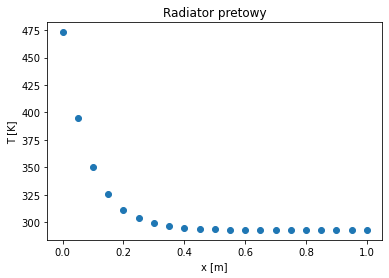

In [54]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, L, N+1)

y = np.insert(solution, 0, T_0)
y = np.append(y, T_L)

ax.scatter(x, y)
plt.xlabel("x [m]")
plt.ylabel("T [K]")
plt.title("Radiator pretowy")